**American Sign Language**

Extracting the files from Zip folder

In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = '/content/drive/MyDrive/ASL/archive.zip'

# Directory to extract the files to
extract_to_directory = '/content/drive/MyDrive/ASL'

# Create directory if it doesn't exist
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

print("Files extracted successfully.")


Files extracted successfully.


**Import Required Libraries**

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
from matplotlib.image import imread

**Set Path for Test and Train Data**

In [ ]:
train_data="/content/drive/MyDrive/ASL/asl_alphabet_train/asl_alphabet_train"
test_data="/content/drive/MyDrive/ASL/asl_alphabet_test/asl_alphabet_test"
folders = os.listdir(train_data)
print(folders)
folders.sort()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


**Preprocessing Images**

In [ ]:
images=[]
labels=[]
def preprocessing_images_in_batch(images=images,labels=labels,data_dir=train_data,batch_size=50):
    for folder in folders :
        data=os.listdir(train_data+'/'+folder)

        #print(len(data))
        for i in range(0,450,batch_size):
            batch_files = data[i:i+batch_size]
            for image in batch_files :
                img=cv.imread(train_data+'/'+folder+'/'+image)
                img=cv.resize(img,(64,64),cv.INTER_LINEAR)
                labels.append(folder)
                images.append(img)

preprocessing_images_in_batch()
print("preprocessing completed...!!!")

preprocessing completed...!!!


In [ ]:
len(images)

13050

In [ ]:
images=np.array(images)
labels=np.array(labels)
# Save arrays to .npy files
np.save('images.npy', images)
np.save('labels.npy', labels)

**Import train_test_split,LabelEncoder and tensorflow libraries**

In [ ]:
#!pip install tensorflow

from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
images.shape

(13050, 64, 64, 3)

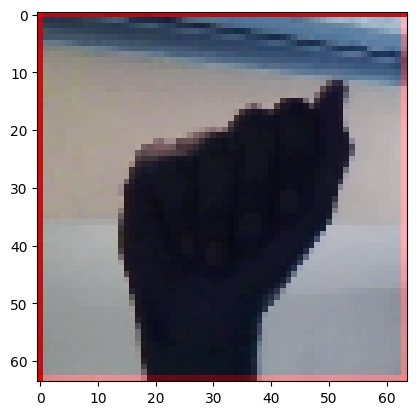

In [ ]:
plt.imshow(images[1])

In [ ]:
# Load images and labels from NumPy files
images = np.load('/content/drive/MyDrive/ASL/images.npy')
labels = np.load('/content/drive/MyDrive/ASL/labels.npy')
len(images)

13050

**Normalizing and Label Encoding**

In [ ]:
def preprocess_data(X, y):
    normalised_X = X.astype('float32')/255.0
    label_encoded=encoder.fit_transform(y)

    x_train, x_test, y_train, y_test = train_test_split(normalised_X,label_encoded, test_size = 0.2)
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = preprocess_data(images,labels)

In [ ]:
y_train

array([2, 6, 1, ..., 3, 0, 5])

**Train the Model**

In [ ]:
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(64,64,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,kernel_size=(3,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128,kernel_size=(3,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(256,kernel_size=(3,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(204,activation="relu"),
    keras.layers.Dropout(0.2),
    # keras.layers.Dense(29, activation="softmax")
    keras.layers.Dense(29, activation="relu"),  # Change softmax to relu
])

**Optimizer and Loss Function**

In [ ]:
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["acc"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

**Fit the Model**

In [ ]:
results = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=64)

Epoch 1/30
164/164 [==============================] - 88s 529ms/step - loss: 2.2411 - acc: 0.3890 - val_loss: 0.8313 - val_acc: 0.7908
Epoch 2/30
164/164 [==============================] - 74s 449ms/step - loss: 0.4489 - acc: 0.8681 - val_loss: 0.1027 - val_acc: 0.9724
Epoch 3/30
164/164 [==============================] - 74s 449ms/step - loss: 0.1349 - acc: 0.9591 - val_loss: 0.0400 - val_acc: 0.9881
Epoch 4/30
164/164 [==============================] - 74s 454ms/step - loss: 0.0729 - acc: 0.9764 - val_loss: 0.0407 - val_acc: 0.9858
Epoch 5/30
164/164 [==============================] - 74s 452ms/step - loss: 0.0672 - acc: 0.9777 - val_loss: 0.0212 - val_acc: 0.9927
Epoch 6/30
164/164 [==============================] - 82s 502ms/step - loss: 0.0539 - acc: 0.9818 - val_loss: 0.0186 - val_acc: 0.9966
Epoch 7/30
164/164 [==============================] - 73s 448ms/step - loss: 0.0202 - acc: 0.9939 - val_loss: 0.0040 - val_acc: 0.9985
Epoch 8/30
164/164 [==============================] - 7

In [ ]:
import pickle

# Save the results object to a file
with open('training_results.pkl', 'wb') as f:
    pickle.dump(results, f)


NameError: name 'results' is not defined

In [ ]:
# Load the results object from the file
with open('/content/drive/MyDrive/ASL/training_results.pkl', 'rb') as f:
    loaded_results = pickle.load(f)


**Plot Train vs Validation Accuracy**

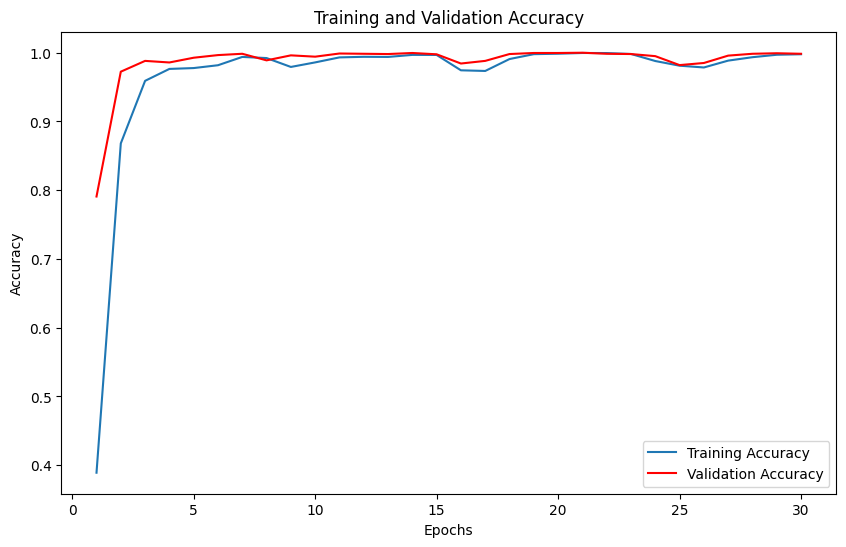

In [ ]:
train_acc = results.history['acc']
val_acc = results.history['val_acc']

# Create a range of epochs for the x-axis
epochs = range(1, len(train_acc) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Plot Train vs Validation Loss**

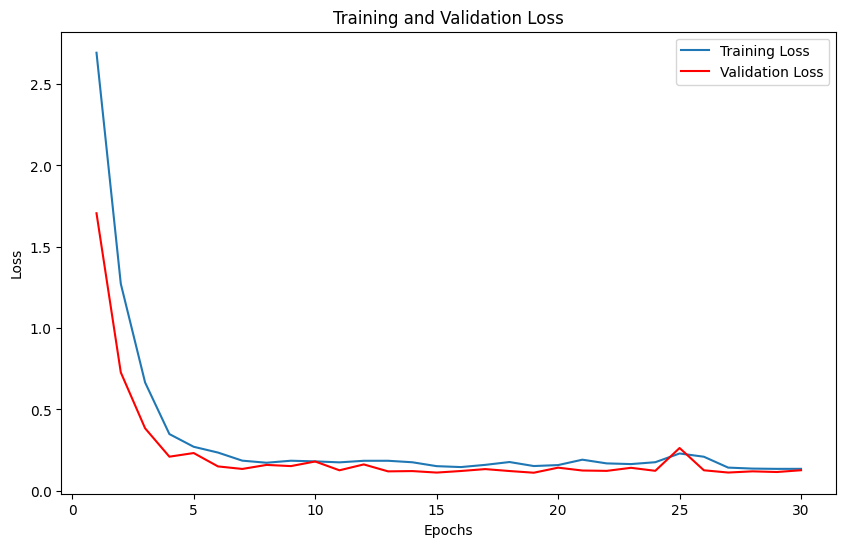

In [ ]:
train_loss = results.history['loss']
val_loss = results.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Validating the Model**

In [ ]:
test_predictions = []  # List to store predictions

def testing(x_test):
    for image in x_test:
        image = np.expand_dims(image, axis=0)
        results = model.predict(image)
        test_predictions.append(results)
    return test_predictions

t_predictions = testing(x_test)
t_array = np.vstack(t_predictions)

1/1 [==============================] - 0s 21ms/step


**Encoding and Inverse Transformation**

In [ ]:
predicted_class_test_index = np.argmax(t_array, axis=1)
predicted_class_test = encoder.inverse_transform(predicted_class_test_index)

In [ ]:
y_test_1 = encoder.inverse_transform(y_test)

In [ ]:
correct_predictions = np.sum(predicted_class_test == y_test_1)
accuracy = correct_predictions / len(y_test)

print("Accuracy:", accuracy)

Accuracy: 0.9984674329501916


**Testing the Model**

1/1 [==============================] - 0s 22ms/step
Predicted class: B


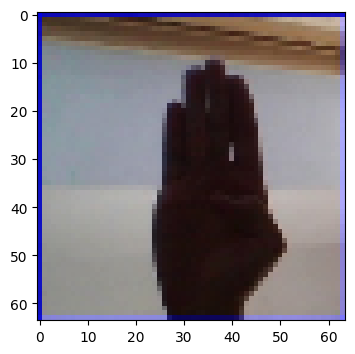

In [ ]:
def preprocess_image(image_path):
    # Load and resize the image to 64x64
    img = cv.imread(image_path)
    img = cv.resize(img, (64, 64))
    img = img.astype('float32') / 255.0  # Normalize the pixel values to [0, 1]
    return img

def predict_image(image_path, model, label_encoder):
    # Preprocess the image
    img = preprocess_image(image_path)
    # Expand dimensions to create a batch with a single image
    img = np.expand_dims(img, axis=0)
    # Make predictions using the model
    predictions = model.predict(img)
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    # Decode the predicted class using the label encoder
    predicted_class = encoder.inverse_transform([predicted_class_index])[0]
    return predicted_class

# Example usage:
image_path_to_predict = '/content/drive/MyDrive/ASL/asl_alphabet_test/asl_alphabet_test/B_test.jpg'
predicted_class = predict_image(image_path_to_predict, model, encoder)
print(f'Predicted class: {predicted_class}')
plt.figure(figsize=(4,4))
img = preprocess_image(image_path_to_predict)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


1/1 [==============================] - 0s 27ms/step
Predicted class: space


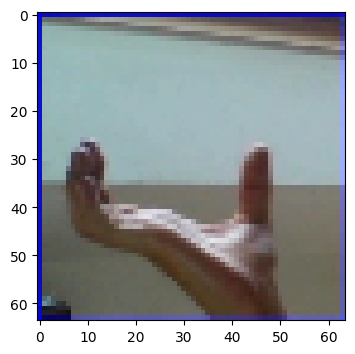

In [ ]:
image_path_to_predict = '/content/drive/MyDrive/ASL/asl_alphabet_test/asl_alphabet_test/space_test.jpg'
predicted_class = predict_image(image_path_to_predict, model, encoder)
print(f'Predicted class: {predicted_class}')
plt.figure(figsize=(4,4))
img = preprocess_image(image_path_to_predict)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

1/1 [==============================] - 0s 21ms/step
Predicted class: A


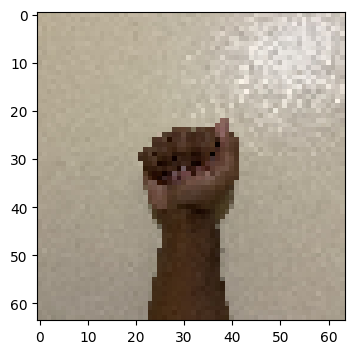

In [ ]:
image_path_to_predict = '/content/drive/MyDrive/ASL/IMG_7044.jpg'
predicted_class = predict_image(image_path_to_predict, model, encoder)
print(f'Predicted class: {predicted_class}')
plt.figure(figsize=(4,4))
img = preprocess_image(image_path_to_predict)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

1/1 [==============================] - 0s 100ms/step
Predicted class: A


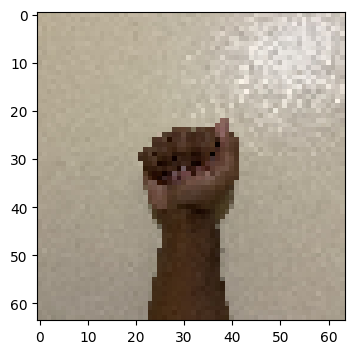

In [ ]:
image_path_to_predict = '/content/drive/MyDrive/ASL/IMG_7044.jpg'
predicted_class = predict_image(image_path_to_predict, model, encoder)
print(f'Predicted class: {predicted_class}')
plt.figure(figsize=(4,4))
img = preprocess_image(image_path_to_predict)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))